In [79]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
# sampling interval (s)
DELTA_T = 30 

# number of linear model
N = 20

# time simulation (s)
T_SIMULATION = 100*60


# Parameter
RESPONSE_PARAM = {
    'DB-CO': {'Ku': 15.8,  'T': 164.3, 'L': 30, 'P1': 105.3, 'P2': 0.028}, 
    'DB-AP': {'Ku': 4.4,   'T': 65.2,  'L': 30, 'P1': 22.8,  'P2': 0.145},  
    'SN-CO': {'Ku': 3.0,   'T': 40.6,  'L': 60, 'P1': 37.7,  'P2': 0.051}, 
    'SN-AP': {'Ku': -12.5, 'T': 209.4, 'L': 60, 'P1': -26.2, 'P2': -0.085}
}

# Create Range T
RANGE_T = list(range(DELTA_T, T_SIMULATION+1, DELTA_T))
RANGE_T.insert(0, 0) # [0, 30, 60, ...]

# MODELING
def math_model(u, drug_response):

    Ku = RESPONSE_PARAM[drug_response]['Ku']
    T = RESPONSE_PARAM[drug_response]['T']
    L = RESPONSE_PARAM[drug_response]['L']
    P1 = RESPONSE_PARAM[drug_response]['P1']
    P2 = RESPONSE_PARAM[drug_response]['P2']


    unit_impulse = [ (Ku/T)*np.exp(-(t-L)/T)*DELTA_T if t>0 else 0 for t in RANGE_T ]

    out_linear = []
    out_nonlinear = []

    for t_index in range(0, len(u)):

        # Linear Model (Unit Impulse Reponse)
        temp = 0
        for to in range(0, N+1):    
            if t_index <= to:
                u_delay = 0
            else:
                u_delay = u[t_index-to]
            temp += unit_impulse[to] * u_delay
        out_linear.append(temp)

        # Nonlinear Model (sigmoid)
        out_nonlinear.append(P1 * math.tanh((P2*temp)/2))

    return out_linear, out_nonlinear


###########
INPUT_DB = []
for t in RANGE_T:
    INPUT_DB.append(random.uniform(0, 10))

INPUT_SN = []
for t in RANGE_T:
    INPUT_SN.append(random.uniform(0, 10))

###########


CO1_linear, CO1_nonlinear = math_model(u=INPUT_DB, drug_response='DB-CO')
CO2_linear, CO2_nonlinear = math_model(u=INPUT_SN, drug_response='SN-CO')

AP1_linear, AP1_nonlinear = math_model(u=INPUT_SN, drug_response='SN-AP')
AP2_linear, AP2_nonlinear = math_model(u=INPUT_DB, drug_response='DB-AP')

k1, k2, l1, l2 = 1, 1, 1, 1
CO = [None]*len(RANGE_T)
AP = [None]*len(RANGE_T)
for t in range(0, len(RANGE_T)):
    CO[t] = k1*CO1_nonlinear[t] + k2*CO2_nonlinear[t]
    AP[t] = l1*AP1_nonlinear[t] + l2*AP2_nonlinear[t]

LENGTH_DATA = len(RANGE_T)

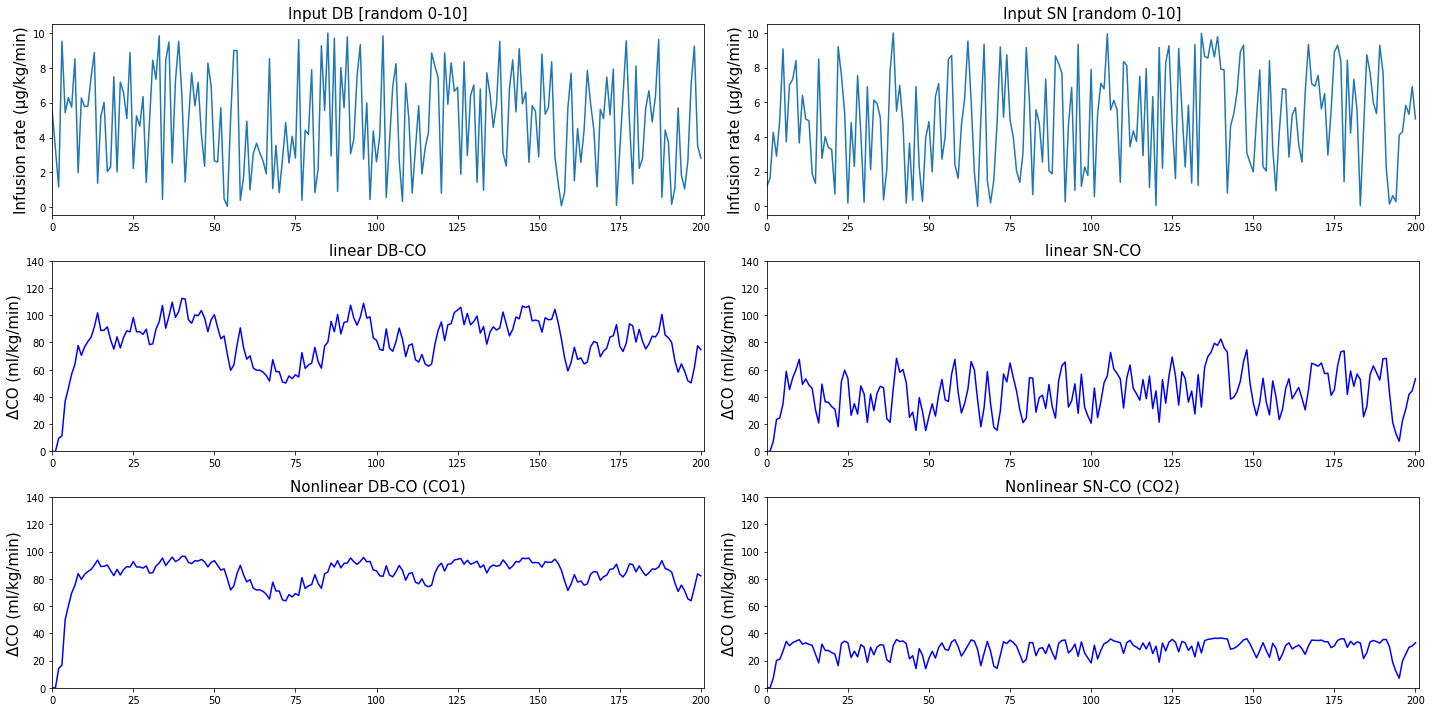

In [81]:
plt.figure(figsize=(20,10))

## DB - CO
plt.subplot(321)
plt.plot(INPUT_DB)
plt.xlim((0, LENGTH_DATA))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input DB [random 0-10]', fontsize=15)

plt.subplot(323)
plt.plot(CO1_linear, 'b')
plt.xlim((0, LENGTH_DATA))
plt.ylim((0, 140))
plt.ylabel('ΔCO (ml/kg/min)', fontsize=15)
plt.title('linear DB-CO', fontsize=15)

plt.subplot(325)
plt.plot(CO1_nonlinear, 'b')
plt.xlim((0, LENGTH_DATA))
plt.ylim((0, 140))
plt.ylabel('ΔCO (ml/kg/min)', fontsize=15)
plt.title('Nonlinear DB-CO (CO1)', fontsize=15)

#  SN - CO
plt.subplot(322)
plt.plot(INPUT_SN)
plt.xlim((0, LENGTH_DATA))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input SN [random 0-10]', fontsize=15)

plt.subplot(324)
plt.plot(CO2_linear, 'b')
plt.xlim((0, LENGTH_DATA))
plt.ylim((0, 140))
plt.ylabel('ΔCO (ml/kg/min)', fontsize=15)
plt.title('linear SN-CO', fontsize=15)

plt.subplot(326)
plt.plot(CO2_nonlinear, 'b')
plt.xlim((0, LENGTH_DATA))
plt.ylim((0, 140))
plt.ylabel('ΔCO (ml/kg/min)', fontsize=15)
plt.title('Nonlinear SN-CO (CO2)', fontsize=15)

plt.tight_layout()



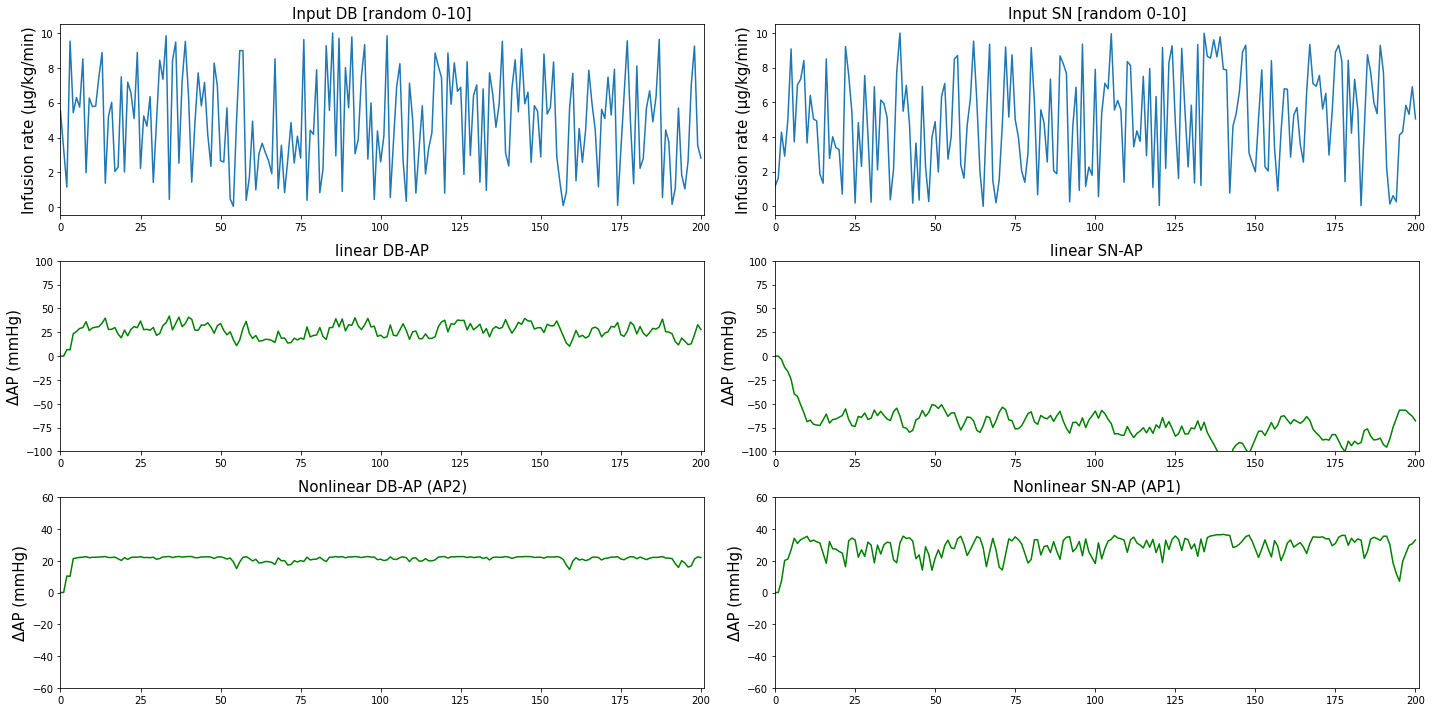

In [82]:
plt.figure(figsize=(20,10))

## DB - AP
plt.subplot(321)
plt.plot(INPUT_DB)
plt.xlim((0, LENGTH_DATA))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input DB [random 0-10]', fontsize=15)

plt.subplot(323)
plt.plot(AP2_linear, 'g')
plt.xlim((0, LENGTH_DATA))
plt.ylim((-100, 100))
plt.ylabel('ΔAP (mmHg)', fontsize=15)
plt.title('linear DB-AP', fontsize=15)

plt.subplot(325)
plt.plot(AP2_nonlinear, 'g')
plt.xlim((0, LENGTH_DATA))
plt.ylim((-60, 60))
plt.ylabel('ΔAP (mmHg)', fontsize=15)
plt.title('Nonlinear DB-AP (AP2)', fontsize=15)

#  SN - AP
plt.subplot(322)
plt.plot(INPUT_SN)
plt.xlim((0, LENGTH_DATA))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input SN [random 0-10]', fontsize=15)

plt.subplot(324)
plt.plot(AP1_linear, 'g')
plt.xlim((0, LENGTH_DATA))
plt.ylim((-100, 100))
plt.ylabel('ΔAP (mmHg)', fontsize=15)
plt.title('linear SN-AP', fontsize=15)

plt.subplot(326)
plt.plot(CO2_nonlinear, 'g')
plt.xlim((0, LENGTH_DATA))
plt.ylim((-60, 60))
plt.ylabel('ΔAP (mmHg)', fontsize=15)
plt.title('Nonlinear SN-AP (AP1)', fontsize=15)

plt.tight_layout()

201


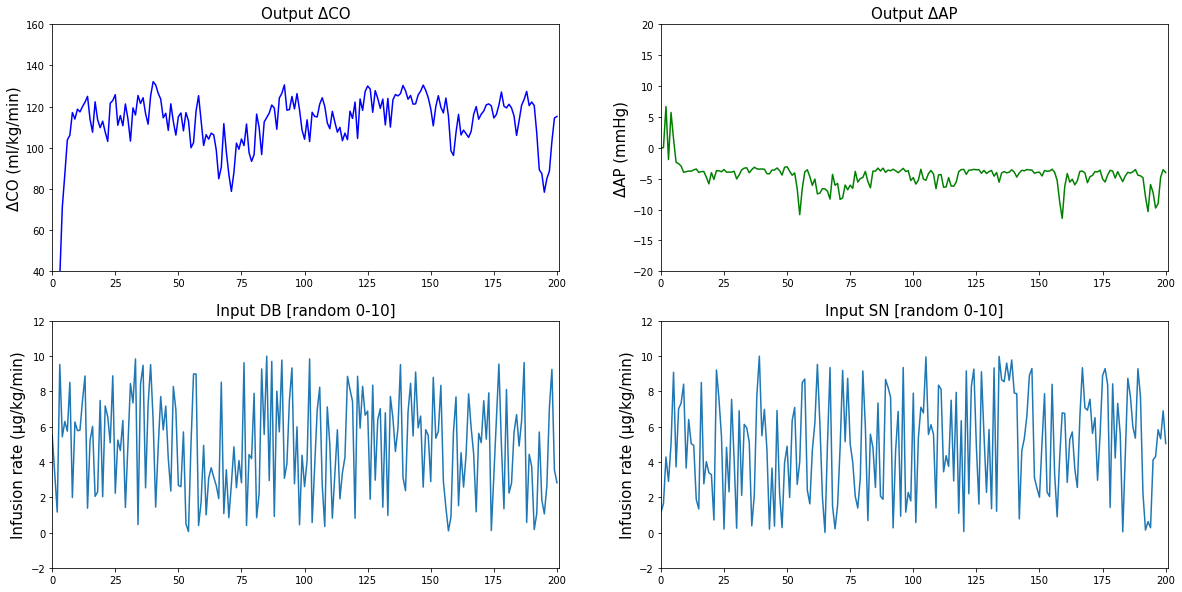

In [83]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.plot(CO, 'b')
plt.xlim((0, LENGTH_DATA))
plt.ylim((40, 160))
plt.ylabel('ΔCO (ml/kg/min)', fontsize=15)
plt.title('Output ΔCO', fontsize=15)

plt.subplot(222)
plt.plot(AP, 'g')
plt.xlim((0, LENGTH_DATA))
plt.ylim((-20, 20))
plt.ylabel('ΔAP (mmHg)', fontsize=15)
plt.title('Output ΔAP', fontsize=15)

plt.subplot(223)
plt.plot(INPUT_DB)
plt.xlim((0, LENGTH_DATA))
plt.ylim((-2, 12))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input DB [random 0-10]', fontsize=15)

plt.subplot(224)
plt.plot(INPUT_SN)
plt.xlim((0, LENGTH_DATA))
plt.ylim((-2, 12))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input SN [random 0-10]', fontsize=15)

print(len(CO))

In [84]:
"""
Prepare Dataset
"""
from sklearn.model_selection import train_test_split

SEQ = 6
INDEX_SPLIT = int(0.8*LENGTH_DATA)

# Version 2
def prepare_data_model(input_DB, input_SN, output):

    ## SPLIT DATA_MODEL & DATA_TEST

    input_DB_train = input_DB[2:INDEX_SPLIT]
    input_SN_train = input_SN[2:INDEX_SPLIT]
    output_train = output[2:INDEX_SPLIT]

    input_DB_test = INPUT_DB[INDEX_SPLIT:]
    input_SN_test = INPUT_SN[INDEX_SPLIT:]
    output_test = output[INDEX_SPLIT:]


    ## NORMALIZE DATA_MODEL
    input_DB_train_norm = (input_DB_train - np.mean(input_DB_train)) / np.std(input_DB_train)
    input_SN_train_norm = (input_SN_train - np.mean(input_SN_train)) / np.std(input_SN_train)
    output_train_norm = (output_train - np.mean(output_train)) / np.std(output_train)
   
    ## GENERATE MATRIX INPUT FROM DATA_MODEL (3x6)
    x_list = []
    y_list = []
    for i in range(SEQ, len(output_train_norm)):
        row1 = input_DB_train_norm[i-SEQ : i]
        row2 = input_SN_train_norm[i-SEQ : i]
        row3 = output_train_norm[i-SEQ : i]

        x_list.append(np.array([row1, row2, row3]))
        y_list.append(output_train_norm[i])

    x = np.array(x_list)
    y = np.array(y_list)
    print(x.shape)
    print(y.shape)

    x = x.reshape((-1, 3, SEQ, 1))
    y = y.reshape((-1, 1))
    print('x shape: ', x.shape)
    print('y shape: ',y.shape)

    # ## SPLIT INPUT INTO TRAIN/VALIDATION
    # # x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=5)
    # x_train, x_val = x[0:split], x[split:]
    # y_train, y_val = y[0:split], y[split:]

    # print('X_train shape: ', x_train.shape)
    # print('y_train shape: ', y_train.shape)
    # print('X_val shape: ', x_val.shape)
    # print('y_val shape: ', y_val.shape)


    ## NORMALIZE DATA_TEST
    input_DB_test_norm = (input_DB_test - np.mean(input_DB_train)) / np.std(input_DB_train)
    input_SN_test_norm = (input_SN_test - np.mean(input_SN_train)) / np.std(input_SN_train)
    output_test_norm = (output_test - np.mean(output_train)) / np.std(output_train)

    x_list = []
    y_list = []
    for i in range(SEQ, len(output_test_norm)):
        row1 = input_DB_test_norm[i-SEQ : i]
        row2 = input_SN_test_norm[i-SEQ : i]
        row3 = output_test_norm[i-SEQ : i]

        x_list.append(np.array([row1, row2, row3]))
        y_list.append(output_test_norm[i])

    x_test = np.array(x_list)
    y_test = np.array(y_list)
    x_test = x_test.reshape((-1, 3, SEQ, 1))
    y_test = y_test.reshape((-1, 1))

    print('x_test shape: ', x_test.shape)
    print('y_test shape: ', y_test.shape)

    return x, y, x_test, y_test, output_train, output_test


x, y, x_test, y_test, output_train, output_test = prepare_data_model(input_DB=INPUT_DB, 
                                                                    input_SN=INPUT_SN, 
                                                                    output=AP)



(152, 3, 6)
(152,)
x shape:  (152, 3, 6, 1)
y shape:  (152, 1)
x_test shape:  (35, 3, 6, 1)
y_test shape:  (35, 1)


In [85]:
# CNN
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import mean_absolute_error

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(7)

def create_model():
    model = Sequential()
    model.add(Conv2D(filters=12, kernel_size=3, padding="same", activation="relu", input_shape=(3,SEQ,1)))
    model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

    model.add(Conv2D(filters=12, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

    model.add(Conv2D(filters=12, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

    model.add(Flatten())
    model.add(Dense(8, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1))

    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=opt)

    return model



In [86]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

list_folds = list(split(range(len(x)), 5))
print(list_folds)

##
save_config = []

for BATCH_SIZE in [8, 16, 32, 64]:
    for EPOCHS in [50, 100, 150, 200]:
        print(f'\n BATCH_SIZE: {BATCH_SIZE}, EPOCHS: {EPOCHS}')

        fold_concated = list_folds[0]
        sumlen = len(list_folds[0])
        MAE_list = []
        for i in range(len(list_folds)-1):
            
            # Split dataset
            x_train = x[fold_concated]
            y_train = y[fold_concated]
            x_val = x[list_folds[i+1]]
            y_val = y[list_folds[i+1]]
            
            print(f'train index: {fold_concated}, val index: {list_folds[i+1]}')

            # Train Model
            model = create_model()
            history = model.fit(x_train, y_train,
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE,
                            verbose=0)

            # Predict
            y_pred = model.predict(x_test)

            # Convert to pre-scale
            y_pred_convert = y_pred * np.std(output_train) + np.mean(output_train)
            y_test_convert = y_test * np.std(output_train) + np.mean(output_train)

            # score
            MAE = mean_absolute_error(y_test_convert, y_pred_convert)

            # Next loop
            sumlen += len(list_folds[i+1])
            fold_concated = range(0, sumlen)

            ##
            MAE_list.append(MAE)
            del model, history

        
        save_config.append([BATCH_SIZE, EPOCHS, MAE_list])
            







[range(0, 31), range(31, 62), range(62, 92), range(92, 122), range(122, 152)]

 BATCH_SIZE: 8, EPOCHS: 50
train index: range(0, 31), val index: range(31, 62)
train index: range(0, 62), val index: range(62, 92)
train index: range(0, 92), val index: range(92, 122)
train index: range(0, 122), val index: range(122, 152)

 BATCH_SIZE: 8, EPOCHS: 100
train index: range(0, 31), val index: range(31, 62)
train index: range(0, 62), val index: range(62, 92)
train index: range(0, 92), val index: range(92, 122)
train index: range(0, 122), val index: range(122, 152)

 BATCH_SIZE: 8, EPOCHS: 150
train index: range(0, 31), val index: range(31, 62)
train index: range(0, 62), val index: range(62, 92)
train index: range(0, 92), val index: range(92, 122)
train index: range(0, 122), val index: range(122, 152)

 BATCH_SIZE: 8, EPOCHS: 200
train index: range(0, 31), val index: range(31, 62)
train index: range(0, 62), val index: range(62, 92)
train index: range(0, 92), val index: range(92, 122)
train index: r

In [87]:
print(save_config)

[[8, 50, [1.4897384935805869, 0.9866854131791767, 0.7058209046262348, 0.5994818431975698]], [8, 100, [1.1037725487100467, 0.5655871647171374, 0.5849716502924108, 0.5411120735642528]], [8, 150, [1.2200380004253382, 0.7227024808207836, 0.6011824563909534, 0.4936096437412646]], [8, 200, [1.1699141521464949, 0.5358065269941589, 0.4134458420573515, 0.4607534710789378]], [16, 50, [1.2509806205334013, 0.4302757970871562, 0.6761228436110786, 0.5277100552173664]], [16, 100, [1.2396489420676329, 0.8600477978582354, 0.5325548713616164, 0.5151136371811528]], [16, 150, [1.2868978731947733, 0.5690734457553877, 0.4721317067166317, 0.580306470924861]], [16, 200, [1.5665859158688213, 0.6911304755468095, 0.5443702215669165, 0.5004641422342149]], [32, 50, [1.2794520811464618, 0.8495927932056779, 0.5782858848953053, 0.8399862008421018]], [32, 100, [1.1759879185561821, 0.721730444513993, 0.47096800398633415, 0.40866930150243236]], [32, 150, [1.297927186420228, 0.4118472920550687, 0.4989772041328176, 0.4266

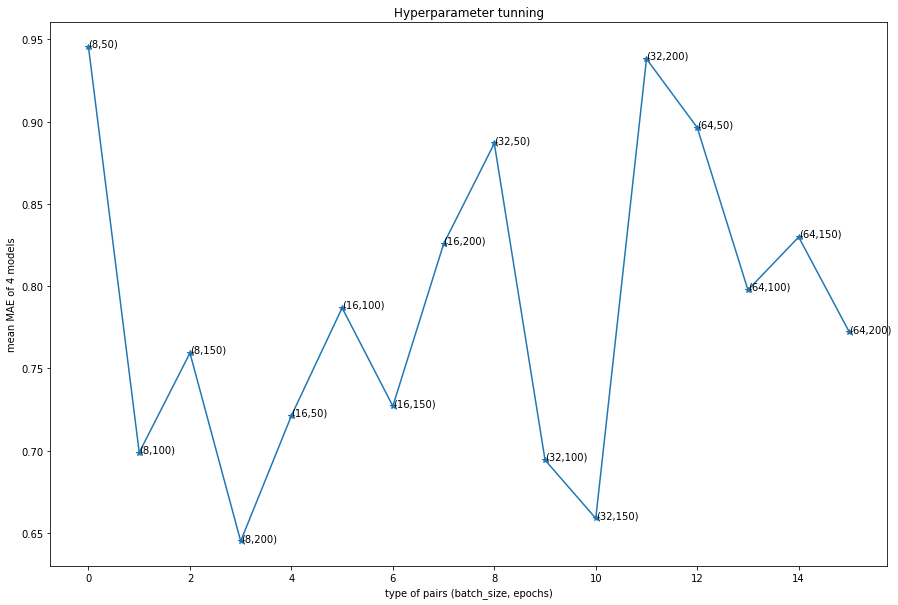

In [88]:
plt.figure(figsize=(15,10))

a=[np.mean(i[2]) for i in save_config]
plt.plot(a,'-*')
plt.ylabel('mean MAE of 4 models')
plt.xlabel('type of pairs (batch_size, epochs)')
plt.title('Hyperparameter tunning')
for i in range(len(a)):
    plt.text(i,a[i], '(%d,%d)'%(save_config[i][0], save_config[i][1]), fontsize=10)
 


In [89]:
BATCH_SIZE=16
EPOCHS=50

# Train Model
model = create_model()
history = model.fit(x, y,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                verbose=1)

# Predict
y_pred = model.predict(x_test)

# Convert to pre-scale
y_pred_convert = y_pred * np.std(output_train) + np.mean(output_train)
y_test_convert = y_test * np.std(output_train) + np.mean(output_train)

# score
MAE = mean_absolute_error(y_test_convert, y_pred_convert)
print(MAE)

Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.5574
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5356
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5086
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4792
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4312
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3760
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3250
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2761
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2391
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2202
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1947
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1694
Epoch 13/50
10/10 [==============================

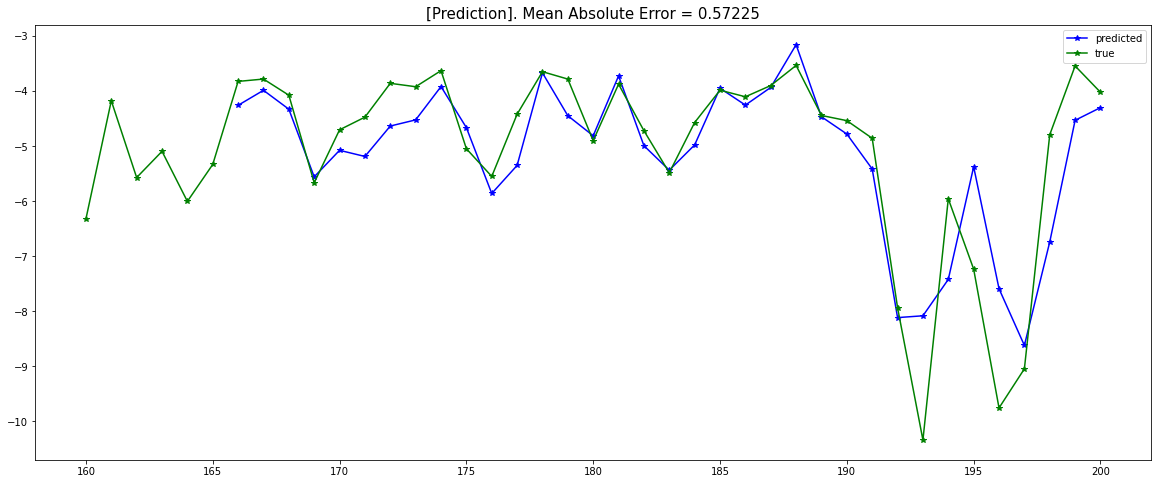

In [90]:
plt.figure(figsize=(20, 8))

plt.plot(range(INDEX_SPLIT+SEQ, LENGTH_DATA), y_pred_convert,'b-*', label='predicted')
plt.plot(range(INDEX_SPLIT, LENGTH_DATA), output_test, 'g-*', label='true')
plt.title('[Prediction]. Mean Absolute Error = %.5f'%(MAE), fontsize=15)
plt.legend()